In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn import model_selection, metrics  #to include metrics for evaluation # this used to be cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
dataset=pd.read_csv("Entreprenureship.csv",";")
dataset

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.10
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.00
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.50
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.70
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.60
5,20,Germany,Developed,Member,Euro,63.6,67.4,0.50,69.90
6,22,Greece,Developed,Member,Euro,43.0,42.0,-1.70,42.50
7,28,Ireland,Developed,Member,Euro,64.3,65.3,-0.30,59.40
8,30,Italy,Developed,Member,Euro,51.4,41.3,0.00,47.20
9,34,Latvia,Developed,Member,Euro,56.6,54.5,0.20,66.40


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


In [ ]:
dataset['Level of development'].replace(['Developed','Developing'],[0,1],inplace=True)
dataset['Currency'].replace(['Euro','National Currency'],[0,1],inplace=True)

In [ ]:
dataset

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,0,Member,0,54.9,64.9,0.90,67.10
1,6,Belgium,0,Member,0,63.6,65.5,0.60,58.00
2,17,Estonia,0,Member,0,55.4,60.2,-0.88,68.50
3,18,Finland,0,Member,0,66.4,65.7,-0.20,67.70
4,19,France,0,Member,0,68.8,67.3,0.00,60.60
5,20,Germany,0,Member,0,63.6,67.4,0.50,69.90
6,22,Greece,0,Member,0,43.0,42.0,-1.70,42.50
7,28,Ireland,0,Member,0,64.3,65.3,-0.30,59.40
8,30,Italy,0,Member,0,51.4,41.3,0.00,47.20
9,34,Latvia,0,Member,0,56.6,54.5,0.20,66.40


In [ ]:
#dataset.pop('Inflation rate')

In [ ]:
dataset.dtypes

No                                         int64
Country                                   object
Level of development                       int64
European Union Membership                 object
Currency                                   int64
Women Entrepreneurship Index             float64
Entrepreneurship Index                   float64
Inflation rate                           float64
Female Labor Force Participation Rate    float64
dtype: object

In [ ]:
dataset["Currency"].value_counts()

1    36
0    15
Name: Currency, dtype: int64

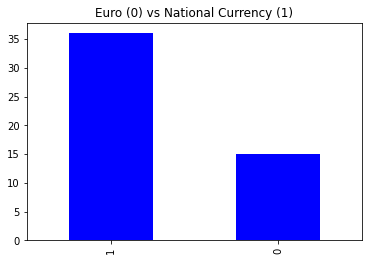

In [ ]:
dataset['Currency'].value_counts().plot(kind = 'bar', title = 'Euro (0) vs National Currency (1)', color = 'blue', align = 'center')
plt.show()

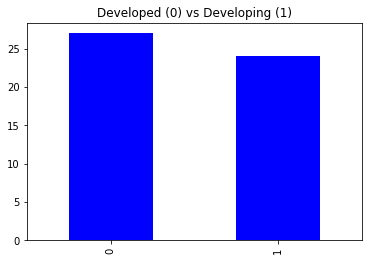

In [ ]:
dataset['Level of development'].value_counts().plot(kind = 'bar', title = 'Developed (0) vs Developing (1)', color = 'blue', align = 'center')
plt.show()

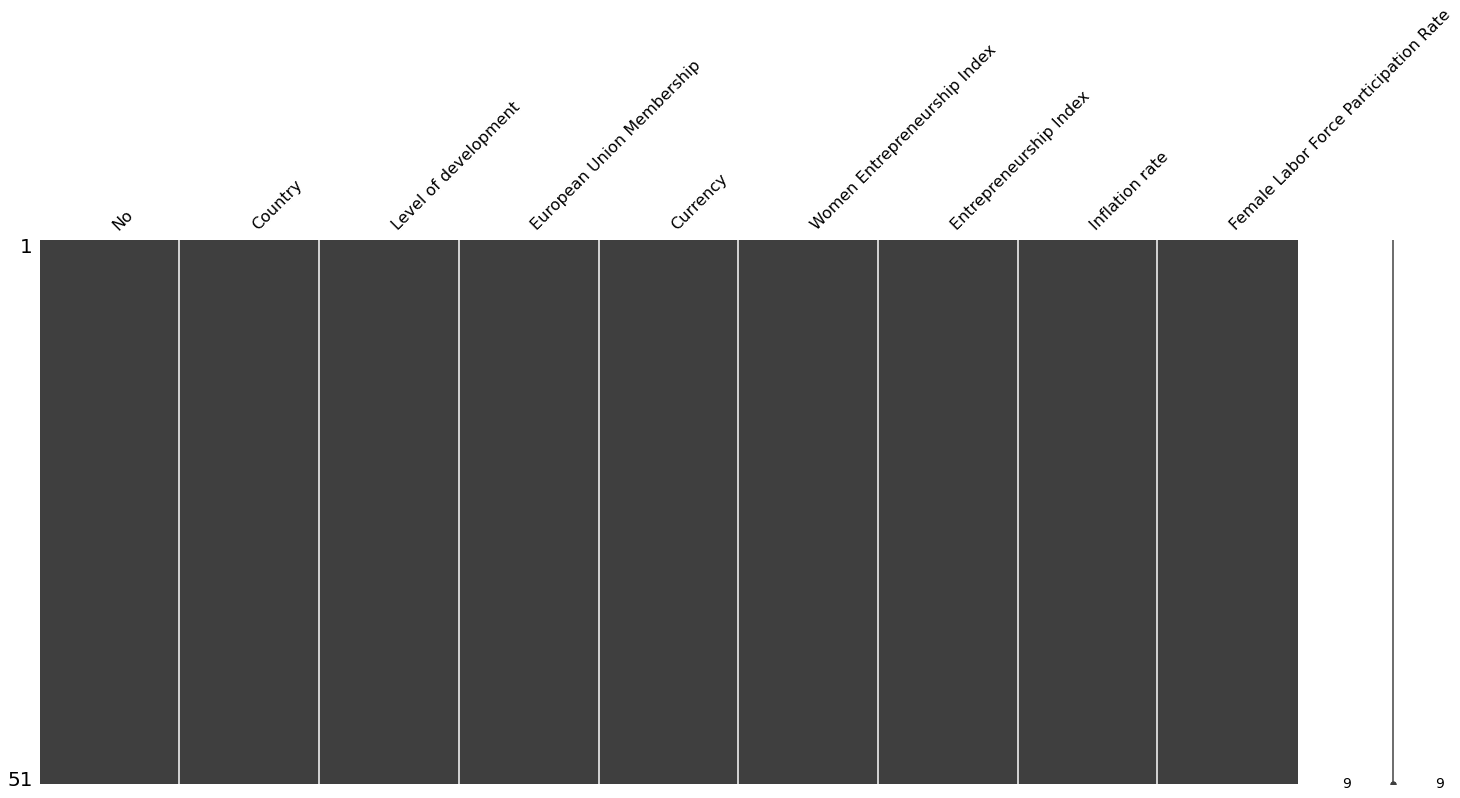

In [ ]:
ms.matrix(dataset)

In [ ]:
features=['Women Entrepreneurship Index','Entrepreneurship Index','Inflation rate','Female Labor Force Participation Rate']
dataset[features].describe()

,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
count,51.000000,51.000000,51.000000,51.000000
mean,47.835294,47.241176,2.587647,58.481765
std,14.268480,16.193149,5.380639,13.864567
min,25.300000,24.800000,-2.250000,13.000000
25%,36.350000,31.900000,-0.500000,55.800000
50%,44.500000,42.700000,0.600000,61.000000
75%,59.150000,65.400000,3.600000,67.400000
max,74.800000,77.600000,26.500000,82.300000


In [ ]:
dataset.dtypes

No                                         int64
Country                                   object
Level of development                       int64
European Union Membership                 object
Currency                                   int64
Women Entrepreneurship Index             float64
Entrepreneurship Index                   float64
Inflation rate                           float64
Female Labor Force Participation Rate    float64
dtype: object

In [ ]:
dataset.pop('No')
dataset.groupby('Level of development').describe()

Currency                     ... Female Labor Force Participation Rate              
                        count      mean      std  ...                                   50%     75%   max
Level of development                              ...                                                    
0                        27.0  0.444444  0.50637  ...                                  64.7  68.850  82.3
1                        24.0  1.000000  0.00000  ...                                  60.1  63.775  73.0

[2 rows x 40 columns]